# Self Organizing Maps

In [1]:
import numpy as np                             # numeric
import matplotlib.pyplot as plt                # plotting
from IPython.display import display, Image     # imported graphics
import matplotlib.cm as cm                     # contour plots 
from mpl_toolkits.mplot3d.axes3d import Axes3D # 3D plots

import sys # system library
sys.path.append('./lib_nn') # my path (linux, Mac OS)

from neural import * # import my library packages

Invoking __init__.py for neural


A very important and ingenious application of unsupervised learning are the so-called **Kohonen networks** ([Teuvo Kohonen](https://en.wikipedia.org/wiki/Teuvo_Kohonen), a class of **self-organizing mappings (SOM)**. Consider firs a mapping $f$ between a **discrete** $k$-dimensional set (we call it a **grid** in this chapter) of neurons and $n$-dimensional input data $D$ (continuous or discrete), 

$$
f: N \to D
$$

(note that **this is not a Kohonen mapping yet!**).
Since $N$ is discrete, each neuron carries an index consisting of $k$ natural numbers, denoted as $\bar {i} = (i_1, i_2, ..., i_k)$. Typically, the dimensions in Kohonen's networks satisfy $n \ge k$. When $n > k$, one talks about **reduction of dimensionality**, as then the input space $D$ has more dimensions than the dimensionaiy of the grid of neurons $N$. 

Two examples of such networks are visualized in {numref}`koh-fig`. The left panel shows a 2-dim. input space $D$, and a one dimensional grid on neurons labeled with $i$. The input point $(x_1,x_2)$ enters all the neurons in the grid, and one of the neurons (the one with best-suited weights) becomes the **winner** (red dot). The gray oval indicates the **neighborhood** of the winner, to be defined accurately in the following. 

The right panel shows an analogous situation for the case of a 3-dim. input and 2-dim. grid of neurons, now labeled with a double index $\bar {i} = (i_1, i_2)$. Here, for clarity, we only indicate the edges entering the winner, but they also enter all the other neurons in the grid, similarly to the left panel. 

:::{figure-md} koh-fig

<img src="images/koha.png" width="500px">

Example of Kohonen's networks. Left: 1-dim. grid of neurons $N$ and 2-dim. input space $D$. Right: 2-dim. grid of neurons $N$ and 3-dim. input space $D$. The red dot indicates the winner, and the gray oval marks its neighborhood.
:::

Next, one defines the neuron **proximity function**, $\phi (\bar {i}, \bar {j})$, which assigns, to a pair of neurons, a real number depending on their relative position in the grid. This function must decrease with the distance between the neuron indices. A popular choice is a Gaussian,

$$ \phi(\bar{i}, \bar{j})=\exp\left [ -\frac{(i_1-j_1)^2+...+(i_k-j_k)^2}{2 \delta^2} \right ] ,$$

where $\delta$ is the **neighborhood radius**. For a 1-dim. grid we have $ \phi(i,j)=\exp\left [ -\frac{(i-j)^2}{2 \delta^2} \right ]$.

## Kohonen's algorithm

The set up for Kohonen's algorithm is similar to the unsupervised learning discussed in the previous chapter. Each neuron $\bar{i}$ obtains weights $f\left(\bar{i}\right)$, which are elements of $D$, i.e. form $n$-dimensional vectors. One may simply think of this procedure as placing the neurons in some locations in $D$. 

When an input point $P$ from $D$ is fed into the network, one looks for the closest neuron, which becomes the **winner**, exactly as in the unsupervised learning algorithm from section {ref}`inn-sec`. However, now comes a **crucial difference**: Not only the winner is attracted (updated) a bit towards $P$, but also its neighbors, to a lesser and lesser extent the farther they are from the winner, as quantified by the proximity function.

```{admonition} Winner-take-most strategy
:class: important

Kohonen's algorithm involves the "winner take most" strategy, where not only the winner neuron is updated (as in the winner-take-all case), but also its neighbors. The neighbors update is strongest for the nearest neighbors, and gradually weakens with the distance from the winner, as given by the proximity function.  
```

```{admonition} Kohnen's algorithm
:class: important

0. Initialize (for instance randomly) $n$-dimensional weight vectors $w_i$, $i-1,\dots,m$ for all the $m$ neurons in the grid. Set an an initial neighborhood radius $ \delta $ and an initial learning speed $ \varepsilon $.

1. Choose (for instance, randomly) a data point $P$ with coordinates $x$ from the input space (possibly with an appropriate probability distribution).

2. Find the neuron (the winner) for which the distance from $P$ is the smallest. Denote its index as $ \bar {l} $.

3. The weights of the winner and its neighbors are updated according to the **winner-take-most** recipe:

$$w_{\bar{i}} \to w_{\bar{i}} + \varepsilon \phi(\bar{i}, \bar{l})(x - w_{\bar{i}}), \hspace{1cm} i=1, \dots , m. 
$$

4. Loop from $1.$ for a specified number of points. 

5. Repeat from $1.$ in rounds, until a satisfactory result is obtained or a stopping criterion is reached. In each round  **reduce** $ \varepsilon $ and $ \delta $ according to a chosen policy. 
```

```{important}
The way the reduction of $ \varepsilon $ and $ \delta $ is done is very important for the desired outcome of the algorithm (see exercises). 
```

###  2-dim. data and 1-dim. neuron grid

In [2]:
num=100 # number of neurons

and the Gaussian proximity function

In [3]:
def phi(i,k,d):                       # proximity function
    return np.exp(-(i-k)**2/(2*d**2)) # Gaussian

This function looks as follows around the middle neuron ($k=50$) and for the width parameter $\delta=5$:

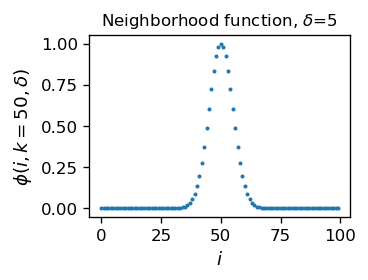

In [4]:
k=50     # index of the selected neuron
d=5      # neighborhood radius delta

plt.figure(figsize=(2.8,2),dpi=120)
plt.title("Neighborhood function, $\delta$="+str(d),fontsize=10) 

ind=[i for i in range(num)]          # neuron indices in the grid
ph= [phi(i,k,d) for i in range(num)] # neighborhood function 

plt.scatter(ind,ph,s=2)

plt.xlabel('$i$',fontsize=11)
plt.ylabel('$\phi(i,k=$'+str(k)+'$,\delta)$',fontsize=11);    

As a feature of a Gaussian, at $|k-i|=\delta$ the function drops to $~60\%$ of the central value, and at $|k-i|=3\delta$ to $~1\%$, a tiny fraction. Hence $\delta$ controls the size of the neighborhood of the winner. The neurons farther away from the winner than, say, $3\delta$ are practically left uncharged. 

We initiate the network by by placing the grid inside the circle, with a random location of each neuron. As said, this amounts to assigning weights to the neuron equal to its location. An auxiliary line is drawn to guide the eye sequentially along the neuron indices: $1,2,3,\dots m$. The line has no other meaning.

The weights (neuron locations) are stored in array **W**:

In [5]:
W=np.array([func.point_c() for _ in range(num)]) # random initialization of weights

As a result of the initial randomness, the neurons are, of course, "chaotically" distributed:

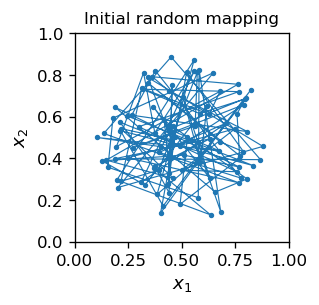

In [6]:
plt.figure(figsize=(2.3,2.3),dpi=120)
plt.title("Initial random mapping",fontsize=10) 
plt.xlim(0,1)
plt.ylim(0,1)

plt.scatter(W[:,0],W[:,1],s=5)
plt.plot(W[:,0],W[:,1],linewidth=0.7)

plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11);    

Next, we initialize the parameters **eps** amd **delta** and run the algorithm. Its structure is analogous to the previously discussed codes and is a straightforward implementation of the steps spelled out in the previous section. For that reason, we only provide the comments in the code.

In [7]:
eps=.5   # initial learning speed 
de = 10  # initial neighborhood distance
ste=0    # inital number of caried out steps

In [8]:
# Kohonen's algorithm
for _ in range(150):              # rounds
    eps=eps*.98                   # dicrease learning speed
    de=de*.95                     # ... and the neighborhood distance
    for _ in range(100):          # loop over points
        p=func.point_c()          # random point
        ste=ste+1                 # count steps
        dist=[func.eucl(p,W[k]) for k in range(num)] 
         # array of squares of Euclidean disances between p and the neuron locations
        ind_min = np.argmin(dist) # index of the winner
        for k in range(num):      # loop over all the neurons
            W[k]+=eps*phi(ind_min,k,de)*(p-W[k]) 
             # update of the neuron locations (weights), depending on proximity

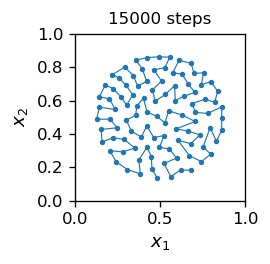

In [9]:
fk=plt.figure(figsize=(2.4,2.3),dpi=120)
plt.title(str(ste)+" steps",fontsize=10) 
plt.xlim(0,1)
plt.ylim(0,1)
 
plt.scatter(W[:,0],W[:,1],s=5)
plt.plot(W[:,0],W[:,1],linewidth=0.7)

plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11)
plt.tight_layout();    

As the above algorithm progresses (see {numref}`kohstory-fig`) the neuron grid first disentangles, and then gradually fills the whole space $D$ (circle) in such a way that the neurons with adjacent indices are located close to each other. 
Figuratively speaking, a new point $P$ attracts towards itself the nearest neuron (the winner), but also, to a weaker extent, its neighbors. At the beginning of the algorithm the neighborhood distance **de** is large, so large chunks of the neighboring neurons in the input grid are pulled together towards $P$, and the arrangement looks as in the top right corner of {numref}`kohstory-fig`. At later stages **de** reduces, so only the winner and possibly its very immediate neighbors are attracted to a new point. 
After completion (bottom right panel), individual neurons "specialize" (are close to) in a certain data area. 

In the present example, after about 20000 steps the result practically stops to change. 

:::{figure-md} kohstory-fig

<img src="images/kaall.png" width="800px">


Progress of Kohonen's algorithm. The line, drawn to guide the eye, connects neurons with adjacent indices.
:::

```{admonition} Kohonen's network as a classifier
:class: note

Having the trained network, we may use it as a classifier similarly as in chapter {ref}`un-lab`. We label a point from $D$ with the index of the nearest neuron. One can interpret this as a Voronoi construction, see section {ref}`vor_lab`.
```

The plots in {numref}`kohstory-fig` are made in coordinates $(x_1,x_2)$, that is, from the "point of view" of the input $D$-space. One may also look at the result from the point of view of the $N$-space, i.e. plot $x_1$ and $x_2$ as functions of the neuron index $i$. 

```{admonition} Caution
:class: note 

When presenting results of Kohonen's algorithm, one sometimes makes plots in $D$-space, and sometimes in $N$-space, which may lead to some confusion.
```
The plots in the $N$-space, fully equivalent in information to the plot in, e.g., the bottom right panel of {numref}`kohstory-fig`, are following:

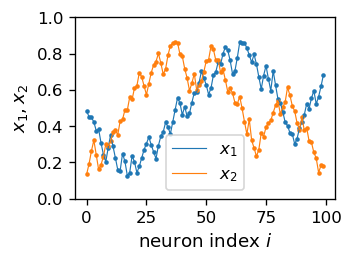

In [10]:
tn = [i for i in range(num)]

plt.figure(figsize=(2.8,2),dpi=120)
plt.ylim(0,1)

plt.scatter(tn,W[:,0],s=3)
plt.plot(tn,W[:,0],linewidth=0.7)

plt.scatter(tn,W[:,1],s=3)
plt.plot(tn,W[:,1],linewidth=0.7)

plt.xlabel('neuron index $i$',fontsize=11)
plt.ylabel('$x_1,x_2$',fontsize=11)

plt.legend(('$x_1$','$x_2$'),fontsize=10);    

We note that the jumps in the above plotted curves are small, since the subsequent neurons are close to each other. This feature can be presented quantitatively as in the histogram below, where we can see that the average distance between the neurons is about 0.07, and the spread is between 0.05 and 0.10.

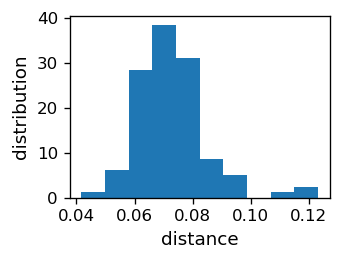

In [11]:
dd=[np.sqrt((W[i+1,0]-W[i,0])**2+(W[i+1,1]-W[i,1])**2) for i in range(num-1)]
        # array of distances between subsequent neurons in the grid

plt.figure(figsize=(2.8,2),dpi=120)

plt.xlabel('distance',fontsize=11)
plt.ylabel('distribution',fontsize=11)

plt.hist(dd, bins=10, density=True);   # histogram

```{admonition} Remarks
:class: note 

- We took a situation in which the data space with the dimension $n = 2$ is "sampled" by a discrete set of neurons forming  $k=1$-dimensional grid. Hence we encounter dimensional reduction.

- The outcome of the algorithm is a network in which a given neuron "focuses" on data from its vicinity. In a general case, where the data can be non-uniformly distributed, the neurons would fill the area containing more data more densely.

- The policy of choosing initial $\delta$ and $\varepsilon $ parameters and reducing them appropriately in subsequent rounds is based on experience and is non-trivial. The results depend significantly on this choice.

- The final result, even with the same $\delta$ and $\varepsilon $ strategy, is not unequivocal, i.e. running the algorithm with a different initialization of the weights (initial positions of neurons) yields different outcomes, usually equally "good".

- Finally, the progress and the result of the algorithm is reminiscent of the construction of the [Peano curve](https://en.wikipedia.org/wiki/Peano_curve) in mathematics, which fills densely an area with a line.
As we increase the number of neurons, the analogy gets closer and closer.
```

### 2 dim. color map

Now we pass to a case of 3-dim. data and 2-dim. neuron grid, which is a situation from the right panel of {numref}`koh-fig` (hence also with dimensionality reduction). As we know, an RGB color is described with three numbers $[r,g,b]$ from $[0,1]$, so it can nicely serve as input in our example.

The distance squared between two colors (this is just a distance between two points in the 3-dim. space) is taken in the Euclidean form:

In [12]:
def dist3(p1,p2): 
    """
    Square of the Euclidean distance between points p1 and p2
    in 3 dimensions.
    """
    return (p1[0]-p2[0])**2+(p1[1]-p2[1])**2+(p1[2]-p2[2])**2

The proximity function is now a Gaussian in two dimensions:

In [13]:
def phi2(ix,iy,kx,ky,d):  # proximity function for 2-dim. grid
    return np.exp(-((ix-kx)**2+(iy-ky)**2)/(d**2))  # Gaussian

We also decide to normalize the RGB colors such that $r^2+g^2+b^2=1$. This makes the perceived intensity of colors similar (this normalization could be dropped, as irrelevant for the method to work).  

In [14]:
def rgbn():
    r,g,b=np.random.random(),np.random.random(),np.random.random() # random RGB
    norm=np.sqrt(r*r+g*g+b*b)                                      # norm
    return np.array([r,g,b]/norm)                                  # normalized RGB

Next, we generate and plot a sample of **ns** points with (normalized) RGB colors:

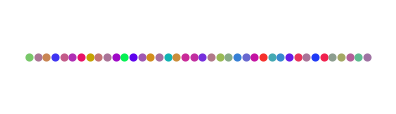

In [15]:
ns=40                            # number of colors in the sample
samp=[rgbn() for _ in range(ns)] # random sample

pls=plt.figure(figsize=(4,1),dpi=120)
plt.axis('off')
for i in range(ns): plt.scatter(i,0,color=samp[i], s=15); 

We use a 2-dim. **size** x **size** grid of neurons. Each neuron's position (that is its color) in the 3-dim. $D$-space is initialized randomly:

In [16]:
size=40                        # neuron array of size x size (40 x 40)
tab=np.zeros((size,size,3))    # create array tab with zeros  

for i in range(size):          # i index in the grid    
    for j in range(size):      # j index in the grid
        for k in range(3):     # RGB: k=0-red, 1-green, 2-blue
            tab[i,j,k]=np.random.random() # random number form [0,1]
            # 3 RGB components for neuron in the grid positin (i,j)

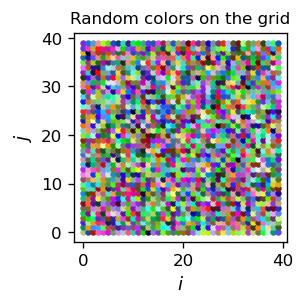

In [17]:
plt.figure(figsize=(2.3,2.3),dpi=120)
plt.title("Random colors on the grid",fontsize=10) 

for i in range(size):
    for j in range(size):
        plt.scatter(i,j,color=tab[i][j], s=8) 
plt.xlabel('$i$',fontsize=11)
plt.ylabel('$j$',fontsize=11);

Now we are ready to run Kohonen's algorithm:

In [18]:
eps=.5   # initial parameters
de = 20  

In [19]:
for _ in range(150):    # rounds
    eps=eps*.995      
    de=de*.96           # de shrinks a bit faster than eps     
    for s in range(ns): # loop over the points in the data sample       
        p=samp[s]       # point from the sample
        dist=[[dist3(p,tab[i][j]) for j in range(size)] for i in range(size)] 
                        # distance of p from all neurons
        ind_min = np.argmin(dist) # the winner index
        ind_1=ind_min//size       # a trick to get a 2-dim index
        ind_2=ind_min%size

        for j in range(size): 
            for i in range(size):
                tab[i][j]+=eps*phi2(ind_1,ind_2,i,j,de)*(p-tab[i][j]) # update         

A word of explanation is in place here, concerning the numpy **argmin** function. For a 2-dim. array it provides the index of the minimum in the corresponding **flattened** array (cf. section {ref}`het-lab`). Hence, to get the indices in the two dimensions, we need to apply the operations **//** (integer division) and **%** (remainder). For instance, in an array **ind_min=53**, then **ind_1=ind_min//size=53//10=5** and **ind_2=ind_min%size=53//10=3**.

As a result of the above code, we get an arrangement of our color sample in two dimensions in such a way that the neighboring areas in the grid have a similar color "specializing" on the color of a given sample point (note the plot is in the $N$-space):

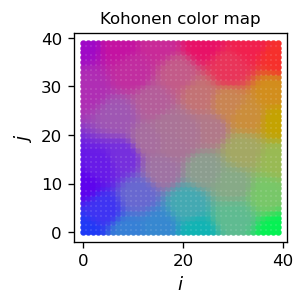

In [20]:
plt.figure(figsize=(2.3,2.3),dpi=120)
plt.title("Kohonen color map",fontsize=10) 

for i in range(size):
    for j in range(size):
        plt.scatter(i,j,color=tab[i][j], s=8)

plt.xlabel('$i$',fontsize=11)
plt.ylabel('$j$',fontsize=11);

```{admonition} Remarks
:class: note

- The areas for the individual colors of the sample have a comparable area. Generally, the area is proportional to the frequency of the data point in the sample.

- To get sharper boundaries between the regions, **de** would have to shrink even faster compared to **eps**. Then, in the final stage of learning, the neuron update process takes place within a smaller neighborhood radius and more resolution in the boundaries can be achieved.
```

## $U$-matrix

A convenient way to present the results of Kohonen's algorithm when the grid is 2-dimensional is via the **unified distance matrix** (shortly **$U$-matrix**). The idea is to plot a 2-dimensional grayscale map in $N$-space with the intensity given by the averaged distance (in $D$-space) of the given neuron to its immediate neighbors, and not a neuron property itself (such as its color in the figure above). This is particularly useful when the dimension of the input space is large, hence it is difficult to visualize the results directly.

The definition of a $U$-matrix element $U_{ij}$ is explained in {numref}`udm-fig`. Let $d$ be the distance in $D$-space and $[i,j]$ denote the neuron of indices $i,j$ . We take

$$
U_{ij}=\sqrt{d\left([i,j],[i+1,j]\right)^2+d\left([i,j],[i-1,j]\right)^2+
        d\left([i,j],[i,j+1]\right)^2+d\left([i,j],[i,j-1]\right)^2 }.
$$

:::{figure-md} udm-fig

<img src="images/udm.png" width="150px">

Construction of $U_{ij}$: a geometric average of the distances along the indicated links.
:::

The Python implementation of the above definition is following:

In [21]:
udm=np.zeros((size-2,size-2))    # initiaize U-matrix with elements set to 0

for i in range(1,size-1):        # loops over the neurons in the grid
    for j in range(1,size-1):
        udm[i-1][j-1]=np.sqrt(dist3(tab[i][j],tab[i][j+1])+dist3(tab[i][j],tab[i][j-1])+
                            dist3(tab[i][j],tab[i+1][j])+dist3(tab[i][j],tab[i-1][j]))
                                 # U-matrix as explained above

The result, corresponding one-to-one to the color map above, can be presented in a contour plot:

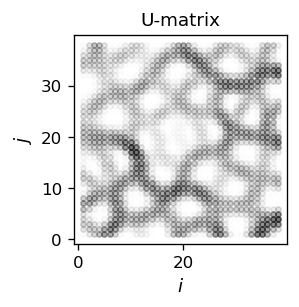

In [22]:
plt.figure(figsize=(2.3,2.3),dpi=120)
plt.title("U-matrix",fontsize=11) 

for i in range(size-2): # loops over indices, excluding the boundaries of the grid
    for j in range(size-2):
        plt.scatter(i+1,j+1,color=[0,0,0,2*udm[i][j]], s=10) 
                        # color format: [R,G,B,intensity], 2 just scales up
plt.xlabel('$i$',fontsize=11)
plt.ylabel('$j$',fontsize=11);

The white regions in the above figure show the clusters (they correspond one-to-one to the regions of the same color in the previously shown color map). There, the elements $U_{ij} \simeq 0$. The clusters are separated with darker boundaries. The higher the dividing ridge between clusters, the darker the intensity.

The result may also be visualized with a 3-dim. plot:

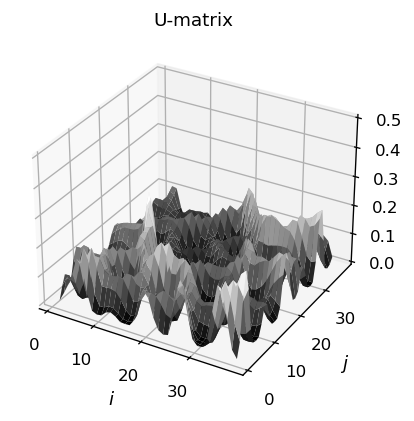

In [23]:
fig = plt.figure(figsize=(4,4),dpi=120)
axes1 = fig.add_subplot(111, projection="3d")
ax = fig.gca()

xx_1 = np.arange(1, size-1, 1)
xx_2 = np.arange(1, size-1, 1)

x_1, x_2 = np.meshgrid(xx_1, xx_2)

Z=np.array([[udm[i][j] for i in range(size-2)] for j in range(size-2)])

ax.set_zlim(0,.5)

ax.plot_surface(x_1,x_2, Z, cmap=cm.gray)

plt.xlabel('$i$',fontsize=11)
plt.ylabel('$j$',fontsize=11);

plt.title("U-matrix",fontsize=11);


We can now classify a given (new) data point according to the obtained map. We generate a new (normalized) RGB color:

In [24]:
nd=rgbn()

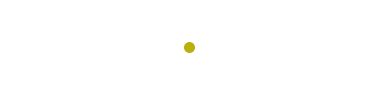

In [25]:
plt.figure(figsize=(6.5,1.5))

plt.axis('off')
plt.scatter(0,0,color=nd, s=100); 

It is useful to obtain a map of distances of our grid neurons from this point:

In [26]:
tad=np.zeros((size,size))

for i in range(size):
    for j in range(size):
        tad[i][j]=dist3(nd,tab[i][j])
        

ind_m = np.argmin(tad) # winner
in_x=ind_m//size      
in_y=ind_m%size 

da=np.sqrt(tad[in_x][in_y])

print("Closest neuron grid indices: (",in_x,",",in_y,")")
print("Distance: ",np.round(da,3))

Closest neuron grid indices: ( 39 , 20 )
Distance:  0.049


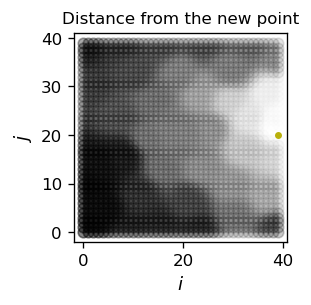

In [27]:
plt.figure(figsize=(2.3,2.3),dpi=120)
plt.title("Distance from the new point",fontsize=10) 

for i in range(size):
    for j in range(size):
        plt.scatter(i,j,color=[0,0,0,tad[i][j]/3], s=40) 
        
plt.scatter(in_x,in_y,color=nd, s=10) 

plt.xlabel('$i$',fontsize=11)
plt.ylabel('$j$',fontsize=11);

The lightest region in the above figure indicates the cluster, to which the new point belongs. The darker the region, the larger is the distance from the corresponding neuron. 

One should stress that we have obtained a classifier which not only assigns a closest cluster to a probed point, but also provides its distances from all other clusters. 

### Mapping colors on a line

In this subsection we present an example of a mapping of 3-dim. data into a 1-dim. neuron grid, hence a reduction of three dimensions into one. This proceeds exactly along the lines of the previous subsection, so we are very brief in comments.

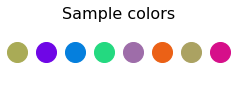

In [28]:
ns=8
samp=[rgbn() for _ in range(ns)]

plt.figure(figsize=(4,1))
plt.title("Sample colors",fontsize=16) 

plt.axis('off')

for i in range(ns):
    plt.scatter(i,0,color=samp[i], s=400);

In [29]:
si=50                    # 1-dim. grid of si neurons, 3 RGB components
tab2=np.zeros((si,3))    # neuron gri

for i in range(si):      
    tab2[i]=rgbn()    # random initialization

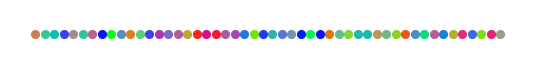

In [30]:
plt.figure(figsize=(5.5,0.5),dpi=120)
plt.axis('off')

for i in range(si):
    plt.scatter(i,0,color=tab2[i], s=20); 

In [31]:
eps=.5    
de = 20   

In [32]:
for _ in range(200): 
    eps=eps*.99      
    de=de*.96        
    for s in range(ns):       
        p=samp[s]
        dist=[dist3(p,tab2[i]) for i in range(si)] 
        ind_min = np.argmin(dist)          
        for i in range(si):
            tab2[i]+=eps*phi(ind_min,i,de)*(p-tab2[i]) 

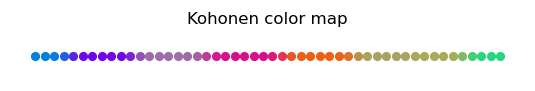

In [33]:
plt.figure(figsize=(5.5,.5),dpi=120)
plt.title("Kohonen color map",fontsize=10) 
plt.axis('off')

for i in range(si):
    plt.scatter(i,0,color=tab2[i], s=20); 

As expected, we note smooth transitions between colors. The formation of clusters can be seen with the $U$-matrix, which now is, of course, one-dimensional:

In [34]:
ta2=np.zeros(si-2)

for i in range(1,si-1):
    ta2[i-1]=np.sqrt(dist3(tab2[i],tab2[i+1])+dist3(tab2[i],tab2[i-1]))

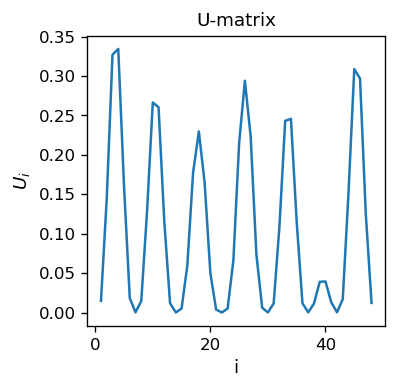

In [35]:
plt.figure(figsize=(3.2,3.2),dpi=120)
plt.title("U-matrix",fontsize=11) 

xr=np.array([i for i in range(1,si-1)])

plt.plot(xr,ta2) 

plt.xlabel('i',fontsize=11)
plt.ylabel('$U_i$',fontsize=11);

The minima (there are 8 of them, equal to the multiplicity of the sample) indicate the clusters. The height of the separating peaks shows how much the neighboring colors differ. Again, we see a nicely produced classifier, this time with two dimensions "hidden away", as we reduce from three to one. 

### Large reduction of dimensionality

In many situations the input space may have a very large dimension. In the [Wikipedia example](https://en.wikipedia.org/wiki/Self-organizing_map) quoted here, one takes articles from various fields and computes frequencies of used words (for instance, in a given article how  many times the word "goalkeeper" has been used, divided by the total number of words in the article). Essentially, the dimensionality of $D$ is of the order of the number of all English words, a huge number $\sim 10^5$! Then, with a properly defined distance depending on these frequencies, one uses Kohonen's algorithm to carry out a reduction into a 2-dim. grid of neurons. The resulting $U$-matrix can be drawn as follows:

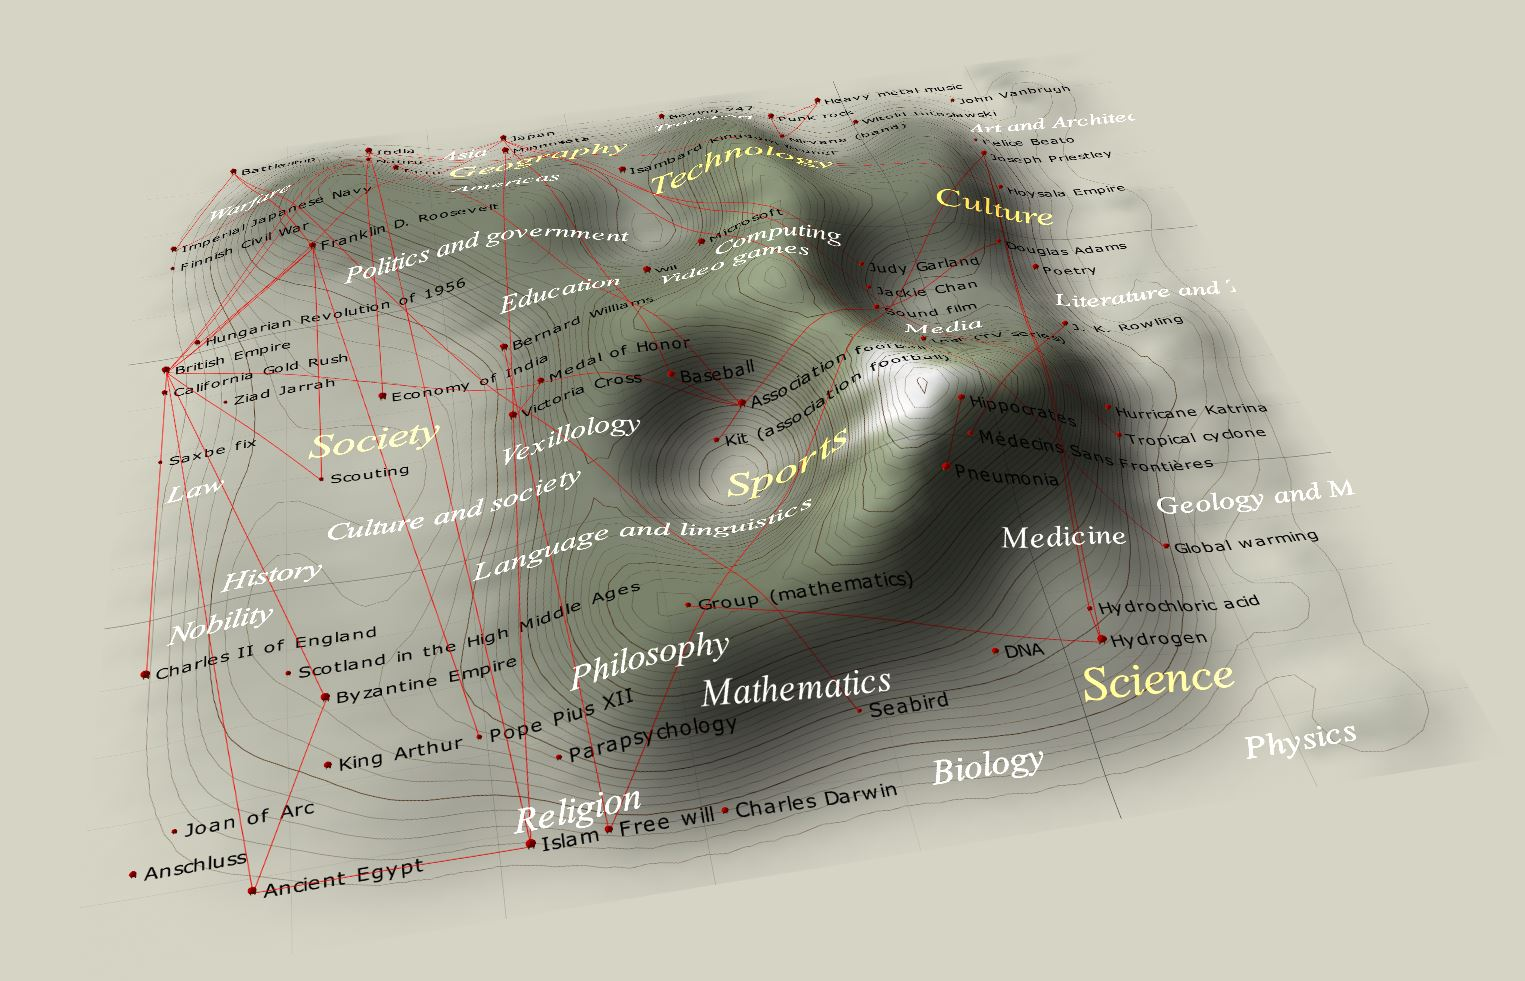

In [36]:
Image(filename="images/Self_oraganizing_map_cartography.jpg",width=720)

Not surprisingly, we notice that articles on sports are special and form a very well defined cluster. The reason is that the sport's jargon is very specific. The Media are also distinguished, whereas other fields are more-less uniformly distributed. The example shows how we can, with a very simple method, comprehend data in a multidimensional space and see specific correlations/clusters. Whereas some conclusions may be obvious, such as the fact that sport has a unique jargon, other are less transparent, for instance the emergence of the media cluster and lack of well-defined clusters for other fields, e.g. for mathematics.

## Mapping 2-dim. data into a 2-dim. grid 

Finally, we come to a very important case of mapping 2-dim. data in a 2-dim. grid, i.e. with no dimensionality reduction. In particular, this case is realized in our vision system between the retina and the visual cortex. 

The algorithm proceeds analogously to the previous cases. We initialize an $n \times n$ grid of neurons and place them randomly in the square $[0,1]\times [0,1]$.

In [37]:
n=10
sam=np.array([func.point() for _ in range(n*n)])

The lines, again drawn to guide the eye, join the adjacent index pairs in the grid: [i,j] and [i+1,j], or [i,j] and [i,j+1] (the neurons in the interior of the grid have 4 nearest neighbors, those at the boundary 3, except for the corners, which have only 2).

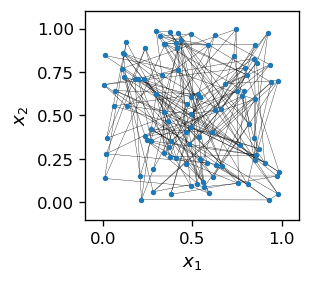

In [38]:
plt.figure(figsize=(2.3,2.3),dpi=120)

plt.xlim(-.1,1.1)
plt.ylim(-.1,1.1)
 
plt.scatter(sam[:,0],sam[:,1],s=5,zorder=3)

# draw the lines
for j in range(n):        # rows
    for i in range(n-1):  # columns
        plt.plot([sam[i+n*j,0],sam[i+1+n*j,0]],[sam[i+n*j,1],sam[i+1+n*j,1]],
                 linewidth=.2,c='black')

for j in range(n-1):       # rows
    for i in range(n):     # columns
        plt.plot([sam[i+n*j,0],sam[i+n*(j+1),0]],[sam[i+n*j,1],sam[i+n*(j+1),1]],
                 linewidth=.2,c='black')
         
plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11);    

We note a total initial "chaos", as the neurons are located randomly. Now comes Kohonen's miracle:   

In [39]:
eps=.5   # initial learning speed
de = 3   # initial neighborhood distance
nr = 100 # number of rounds
rep= 300 # number of points in each round
ste=0    # inital number of caried out steps

In [40]:
# completely analogous to the previous codes of this chapter
for _ in range(nr):   # rounds
    eps=eps*.97      
    de=de*.98         
    for _ in range(rep):    # repeat for rep points
        ste=ste+1
        p=func.point() 
        dist=[func.eucl(p,sam[l]) for l in range(n*n)] 
        ind_min = np.argmin(dist) 
        ind_i=ind_min%n
        ind_j=ind_min//n       
        
        for j in range(n): 
            for i in range(n):
                sam[i+n*j]+=eps*phi2(ind_i,ind_j,i,j,de)*(p-sam[i+n*j]) 


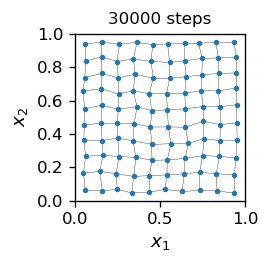

In [41]:
fl=plt.figure(figsize=(2.4,2.3),dpi=120)
plt.title(str(ste)+" steps",fontsize=10) 

plt.xlim(0,1)
plt.ylim(0,1)
 
plt.scatter(sam[:,0],sam[:,1],s=5,zorder=3)

for j in range(n):       # rows
    for i in range(n-1): # columns
        plt.plot([sam[i+n*j,0],sam[i+1+n*j,0]],[sam[i+n*j,1],sam[i+1+n*j,1]],
                 linewidth=.2,c='black')

for j in range(n-1):     # rows
    for i in range(n):   # columns
        plt.plot([sam[i+n*j,0],sam[i+n*(j+1),0]],[sam[i+n*j,1],sam[i+n*(j+1),1]],
                 linewidth=.2,c='black')
        
        
plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11)

plt.tight_layout();    

Here is the history of a simulation:

:::{figure-md} kohstory2-fig

<img src="images/kball.png" width="800px">


Progress of Kohonen's algorithm. The lines, drawn to guide the eye, connects neurons with adjacent indices.
:::

As the algorithm progresses, the initial "chaos" gradually changes into a nearly perfect order, with the grid placed uniformly in the square of the data, with only slight displacements from a regular arrangement. On the way, near 40 steps, we notice a phenomenon called "twist", where the grid is crumpled. In the twist region, many neurons, also of distant indices, have a close location in $(x_1,x_2)$.

## Topology

Recall the Voronoi construction of categories introduced in section {ref}`vor_lab`. One can use it now again, treating the neurons from a grid as the Voronoi points. The Voronoi construction provides a mapping $v$ from the data space $D$ to the neuron space $N$,

$$ 
v: D \to N 
$$

(note that this goes in the opposite direction than function $f$ defined at the beginning of this chapter). 

The procedure is as follows:
We take the final outcome of the algorith, such as in the  bottom right panel of {numref}`kohstory2-fig`, construct the Voronoi areas for all the neurons, and thus obtain a mapping $v$ for all the points in the $(x_1,x_2)$ square. The reader may notice that there is an ambiguity for points lying exactly at the boundaries between the neighboring areas, but this can be taken care of by using an additional prescription (for instance, selecting a neuron lying at a direction which has the lowest azimuthal angle, etc.) 

Now a key observation: 

```{admonition} Topological property
:class: important

For situations without twists, such as in the bottom right panel of {numref}`kohstory2-fig`, mapping $v$ has the property that when $d_1$ and $d_2$ from $D$ are close to each other, then also their corresponding neurons are close, i.e. the indices $v(d_1)$ and $v(d_2)$ are close. 
```

This observation is straightforward to prove: Since $d_1$ and $d_2$ are close (and we mean very close, closer than the grid spacing), they must belong either to

   - the same Voronoi area, where $v(d_1)=v(d_2)$, or
   - a pair of neighboring Voronoi areas. 
   
Since for the considered situation (without twists) the neighboring areas have the grid indices differing by 1, the conclusion that $v(d_1)$ and $v(d_2)$ are close follows immediately.

Note that this feature of Kohonen's maps is far from trivial and does not hold for a general mapping. Imagine for instance that we stop our simulations for {numref}`kohstory2-fig` after 40 steps (top central panel) and are left with a "twisted" grid. In the vicinity of the twist, the indices of the adjacent Voronoi areas differ largely, and the advertised topological property no longer holds. 

The discussed topological property has mathematically general and far-reaching consequences. First, it allows to carry over "shapes" from $D$ to $N$. We illustrate it on an example.

Imagine that we have a circle $C$ in $D$-space, of radius **rad** centered at **cent**. We need to find the winners in the $N$ space for any point in $C$. For this purpose we go around $C$ in **npoi** points equally spaced in the azimuthal angle, and for each one find a winner.

$C$ is parametrized with polar coordinates:

$$
x_1=r \cos \left( \frac{2\pi \phi}{N}  \right)+c_1, \;\;\;
x_2=r \sin \left( \frac{2\pi \phi}{N}  \right)+c_2.
$$

Going to the mathematical notation to Python we use
$r=$**rad**, $\phi$=**ph**, $N=$**npoi**, $(c_1,c_2)=$**[cent]**.
The loop over **ph** goes around the circle.

In [42]:
rad=0.35                      # radius of a circle
cent=np.array([0.5,0.5])      # center of the circle
npoi=400                      # number of points in the circle

wins=[]                       # table of winners

for ph in range(npoi):        # go around the circle
    p=np.array([rad*np.cos(2*np.pi/npoi*ph),rad*np.sin(2*np.pi/npoi*ph)])+cent
                              # the circle in polar coordinates
    dist=[func.eucl(p,sam[l]) for l in range(n*n)] 
      # distances from the point on the circle to the neurons in the nxn grid
    ind_min = np.argmin(dist) # winner
    wins.append(ind_min)      # add winner to the table
        
ci=np.unique(wins)            # remove duplicates from the table      

The result of Kohonen's algorithm is as follows:

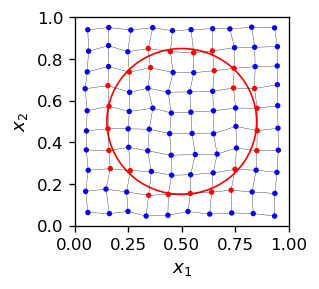

In [43]:
plt.figure(figsize=(2.3,2.3),dpi=120)

plt.xlim(0,1)
plt.ylim(0,1)

co=['blue' for _ in range(n*n)]

for i in ci: co[i]='red'

plt.scatter(sam[:,0],sam[:,1],c=co,s=5,zorder=3)

for j in range(n):       # rows
    for i in range(n-1): # columns
        plt.plot([sam[i+n*j,0],sam[i+1+n*j,0]],[sam[i+n*j,1],sam[i+1+n*j,1]],
                 linewidth=.2,c='black')

for j in range(n-1):       # rows
    for i in range(n): # columns
        plt.plot([sam[i+n*j,0],sam[i+n*(j+1),0]],[sam[i+n*j,1],sam[i+n*(j+1),1]],
                 linewidth=.2,c='black')
        
circ=plt.Circle((cent[0],cent[1]), radius=rad, color='red', fill=False)
plt.gca().add_artist(circ)

        
plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11);

The red neurons are the winners for certain sections of the circle. When we draw these winners alone in the $N$ space (keep in mind we are going from $D$ to $N$), we get

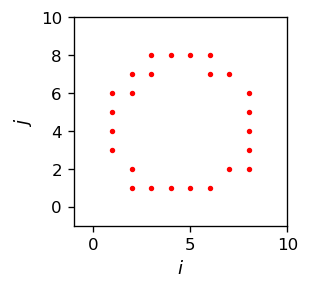

In [44]:
plt.figure(figsize=(2.3,2.3),dpi=120)

plt.xlim(-1,10)
plt.ylim(-1,10)

plt.scatter(ci//10,ci%10,c='red',s=5)

        
plt.xlabel('$i$',fontsize=11)
plt.ylabel('$j$',fontsize=11);

This looks pretty much as a (rough and discrete) circle. Note that in our example we only have $n^2=100$ pixels to our disposal - a very low resolution. The image would look better and better with an increasing $n$. At some point one would reach the 10M pixel resolution of typical camera, and then the image would seem smooth! We have carried over our circle from $D$ into $N$. 

```{admonition} Vision
:class: important

The topological property, such as the one in the discussed Kohonen mappings, has a prime importance in our vision system and the perception of objects. Shapes are carried over from the retina to the visual cortex and are not "warped up" on the way!

```

Another key topological feature is the preservation of **connectedness**. If an area $A$ in $D$ is connected (so to speak, is in one piece), then its image $v(A)$ in $N$ is also connected (we ignore the desired rigor here as to what "connected" means in a discrete space and rely on intuition). So things do not get "torn into pieces" when transforming from $D$ to $N$.


Note that the discussed topological features need not be present when the dimensionality is reduced, as in our previous examples. Take for instance the bottom right panel of {numref}`kohstory-fig`. There, many neighboring pairs of the Voronoi areas correspond to distant indices, so it is no longer true that $v(d_1)$ and $v(d_2)$ in $N$ are close for close $d_1$ and $d_2$ in $D$, as these points may belong to different Voronoi areas with **distant** indices. 

For that case, our example with the circle looks like this:

In [45]:
rad=0.35
cent=np.array([0.5,0.5])
npoi=400

wins1=[]

for th in range(npoi):    # go around the circle
    p=np.array([rad*np.cos(2*np.pi/npoi*th),rad*np.sin(2*np.pi/npoi*th)])+cent
    dist=[func.eucl(p,W[l]) for l in range(num)] 
    ind_min = np.argmin(dist) 
    wins1.append(ind_min)    
        
ci=np.unique(wins1)   

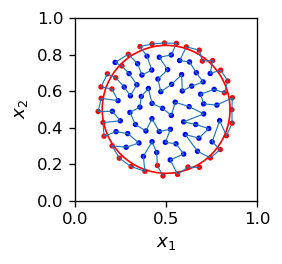

In [46]:
plt.figure(figsize=(2.5,2.3),dpi=120)
plt.xlim(0,1)
plt.ylim(0,1)
 

co=['blue' for _ in range(num)]

for i in ci: co[i]='red'

    
plt.scatter(W[:,0],W[:,1],c=co,s=5)
plt.plot(W[:,0],W[:,1],linewidth=0.7)

        
circ=plt.Circle((cent[0],cent[1]), radius=rad, color='red', fill=False)
plt.gca().add_artist(circ)

plt.xlabel('$x_1$',fontsize=11)
plt.ylabel('$x_2$',fontsize=11)
plt.tight_layout();    

When we go subsequently along the **grid indices** (i.e. along the blue connecting line), taking $i=1,2,\dots,100$, we obtain the plot below. We can see the image of our circle (red dots) as a bunch of **disconnected** red sections. The circle is torn into pieces, the **topology is not preserved!**

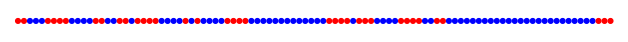

In [47]:
plt.figure(figsize=(6.5,0.2),dpi=120)

plt.xlim(-1,100)
plt.ylim(-1,1)

tl=[i for i in range(num)]

plt.scatter([i for i in range(num)],[0 for i in range(num)],c=co,s=7)

plt.axis('off')       
plt.xlabel('$i$',fontsize=11);

Here is the summarizing statement (NB not made sufficiently clear in the literature): 


```{note}
Topological features of Kohonen's maps hold for equal dimensionalities of the input space and the neuron grid, $n=k$, and in general do not hold for the reduced dimensionality cases, $k<n$.
```

(lat-lab)=
## Lateral inhibition

In the last topic of these lectures, we return to the issue of how the competition for the "winner" is realized in ANNs. Up to now (cf. section {ref}`inn-sec`), we have just been using the minimum (or maximum, when the signal was extended to a hyperphere) in the output, though this is embarrassingly outside of the neural framework. Such an inspection of which neuron yields the strongest signal would require an "external wizard", or some sort of a control unit. Mathematically, it is easy to imagine, but the challenge is to build it from neurons within the rules of the game. 

Actually, if the neurons in a layer "talk" to one another, we can have a "contest" from which a winner may emerge. In particular, an architecture as in {numref}`lat-fig` allows for an arrangement of competition and a natural realization of a **winner-take-most** mechanism. 

The type of models as presented below is known as the [Hopfield networks](https://en.wikipedia.org/wiki/Hopfield_network). Note that we depart here from the **feed-forward** limitation of {numref}`ffnn-fig` and allow for a recursive, or feed-back character.

:::{figure-md} lat-fig

<img src="images/lat3.png" width="220px">

Network with inter-neuron couplings used for modeling lateral inhibition. All the neurons are connected to one another in both directions (lines without arrows). 
:::

Neuron number $i$ receives the signal $s_i = x w_i$, where $x$ is the input (the same for all the neurons), and $w_i$ is the weight of neuron $i$. The neuron produces output $y_i$, where now a part of it is sent to neurons $j$ as $F_{ji} y_i$. Here $F_{ij}$ denotes the coupling strength (we assume $F_{ii}=0$ - no self coupling). Reciprocally, neuron $i$ also receives output from neurons $j$ in the form $F_{ij} y_j$. The summation over all the neurons yields

$$ 
y_i = s_i + \sum_{j\neq i} F_{ij} y_j, 
$$

which in the matrix notation becomes $ y = s + F y$, or $y(I-F)=s$, where $I$ is the identity matrix. Solving for $y$ gives formally

```{math}
:label: eq-lat

y= (I-F)^{-1} s.
```

One needs to model appropriately the coupling matrix $F$. We take

$ F_ {ii} = $ 0,

$ F_ {ij} = - a \exp (- | i-j | / b) ~~ $ for $ i \neq j $, $ ~~ a, b> 0 $,

i.e. assume attenuation (negative feedback), which is strongest for close neighbors and decreases with distance. The decrease is controlled by a characteristic scale $b$. 

The Python implementation is straightforward:

In [48]:
ns = 30;       # number of neurons
b = 4;         # parameter controlling the decrease of damping with distance
a = 1;         # magnitude of damping

F=np.array([[-a*np.exp(-np.abs(i-j)/b) for i in range(ns)] for j in range(ns)]) 
                    # exponential fall-off
    
for i in range(ns):
    F[i][i]=0       # no self-coupling
    

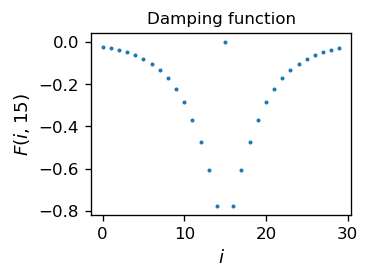

In [49]:
plt.figure(figsize=(2.8,2),dpi=120)
plt.title("Damping function",fontsize=10) 

ii=[i for i in range(ns)]
ff= [F[i][15] for i in range(ns)]

plt.scatter(ii,ff,s=2)

plt.xlabel('$i$',fontsize=11)
plt.ylabel('$F(i,15)$',fontsize=11);    

We assume a bell-shaped Lorentzian input signal $s$, with a maximum in the middle neuron. The width is controlled with **D**:

In [50]:
D=3
s = np.array([D**2/((i - ns/2)**2 + D**2) for i in range(ns)]) # Lorentzian function

Next, we solve Eq. {eq}`eq-lat` via inverting the $(I-F)$ matrix, performed with the numpy **linalg.inv** function. Recall that **dot** multiplies matrices:

In [51]:
invF=np.linalg.inv(np.identity(ns)-F) # matrix inversion
y=np.dot(invF,s)                      # multiplication
y=y/y[15]                             # normalization (inessential) 

What follows is actually quite remarkable: the output signal $y$ becomes much narrower from the input signal $s$. This may be interpreted as a realization of the "winner-take-all" scenario. The winner "damped" he guys around him, so he puts himself on airs! The effect is smooth, with the signal visibly sharpened.

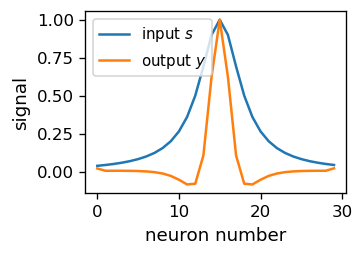

In [52]:
plt.figure(figsize=(2.8,2),dpi=120)

plt.plot(s)
plt.plot(y)
plt.legend(('input $s$','output $y$'),fontsize=9)
plt.xlabel('neuron number',fontsize=11)
plt.ylabel('signal',fontsize=11);    

```{admonition} Lateral inhibition
:class: important

The damping of the response of neighboring neurons is called **lateral inhibition**. It was discovered in neurobiological networks {cite}`hartline1972`. 
```

The presented model is certainly too simplistic to be realistic from the point of view of biological networks. Also, it yields unnatural negative signal outside of the central peak (which we can remove with rectification). Nevertheless, the setup shows a possible way to achieve the "winner competition", essential for unsupervised learning: One needs to allow for the competing neurons to interact.

```{note}
Actually, **pyramidal neurons**, present i.a. in the neocortex, have as many as a few thousand dendritic spines and do realize a scenario with numerous synaptic connections. They are believed [Quantamagazine](https://www.quantamagazine.org/artificial-neural-nets-finally-yield-clues-to-how-brains-learn-20210218/) to play a crucial role in learning and cognition processes. 
```


:::{figure-md} pyr-fig
<img src="images/smi32-pic.jpg" width="300px">

Image of pyramidal neurons (from [brainmaps.org](http://brainmaps.org/index.php?p=screenshots))
:::

## Exercises

```{admonition} $~$
:class: warning

1. Construct a Kohonen mapping form a **disjoint** 2D shape into a 2D grid of neurons.

2. Construct a Kohonen mapping for a case where the points in the input space are not distributed uniformly, but denser in some regions.  

3. Create, for a number of countries, fictitious flags which have two colors (hence are described with 6 RGB numbers). Construct a Kohonen map into a 2-dim. grid. Plot the resulting $U$-matrix and draw conclusions.

3. [Lateral inhibition](https://en.wikipedia.org/wiki/Lateral_inhibition) has "side-effects" seen in optical delusions. Describe the [Mach illusion](https://en.wikipedia.org/wiki/Mach_bands), programming it in Python. 
```